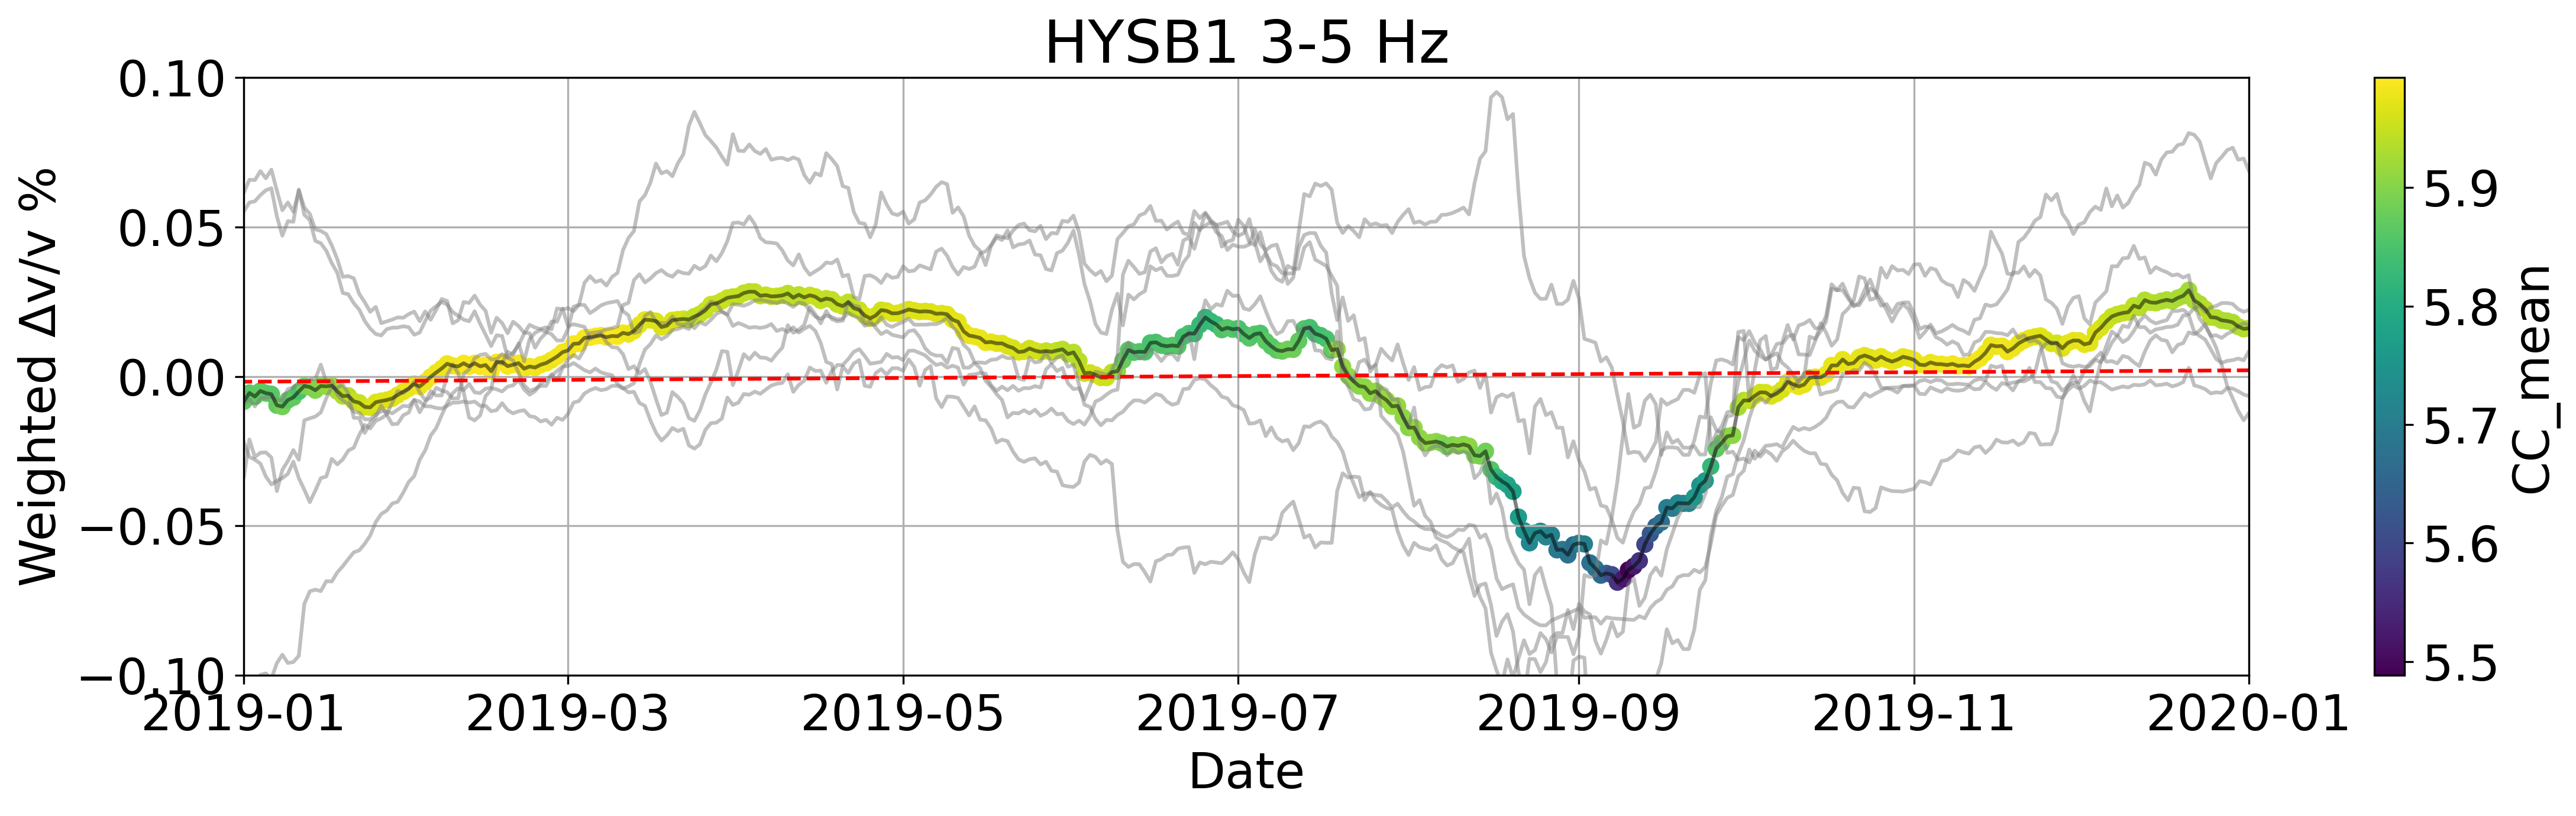

In [3]:
# import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYSB1_long_ZE_positive_3-5.csv',
    'Data/HYSB1_long_ZE_negative_3-5.csv',
    'Data/HYSB1_long_ZN_positive_3-5.csv',
    'Data/HYSB1_long_ZN_negative_3-5.csv',
    'Data/HYSB1_long_NE_negative_3-5.csv',
    'Data/HYSB1_long_NE_positive_3-5.csv',
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1,1,1,1,1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=0)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=0)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')
plt.rcParams.update({'font.size': 20})
# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
plt.ylim([-0.1, 0.1])
plt.title('HYSB1 3-5 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

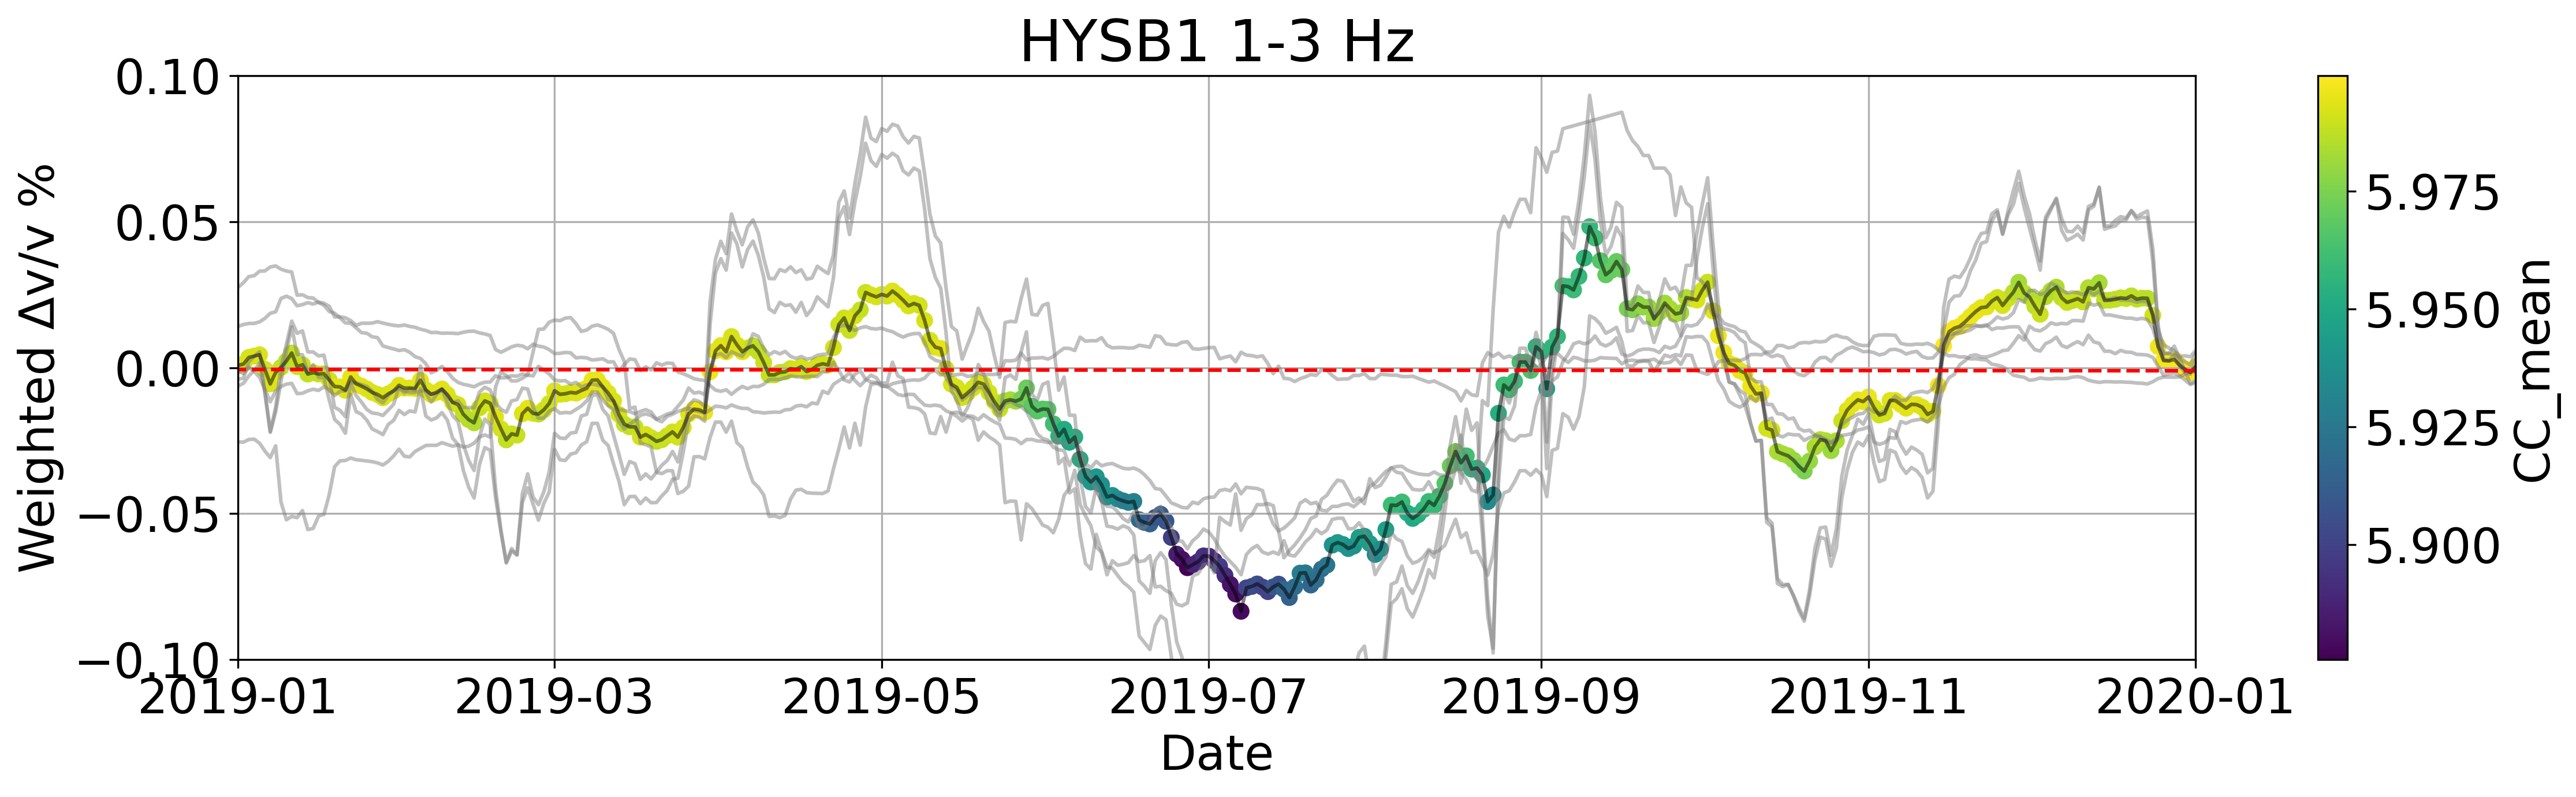

In [4]:
# import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYSB1_late_ZE_positive_1.0-3.0.csv',
    'Data/HYSB1_late_ZE_negative_1.0-3.0.csv',
    'Data/HYSB1_late_ZN_positive_1.0-3.0.csv',
    'Data/HYSB1_late_ZN_negative_1.0-3.0.csv',
    'Data/HYSB1_late_NE_positive_1.0-3.0.csv',
    'Data/HYSB1_late_NE_negative_1.0-3.0.csv'
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1, 1,1,1,1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=0)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=0)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')

# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
plt.ylim([-0.1, 0.1])
plt.title('HYSB1 1-3 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

HYSB1_13 = weighted_dvv_df


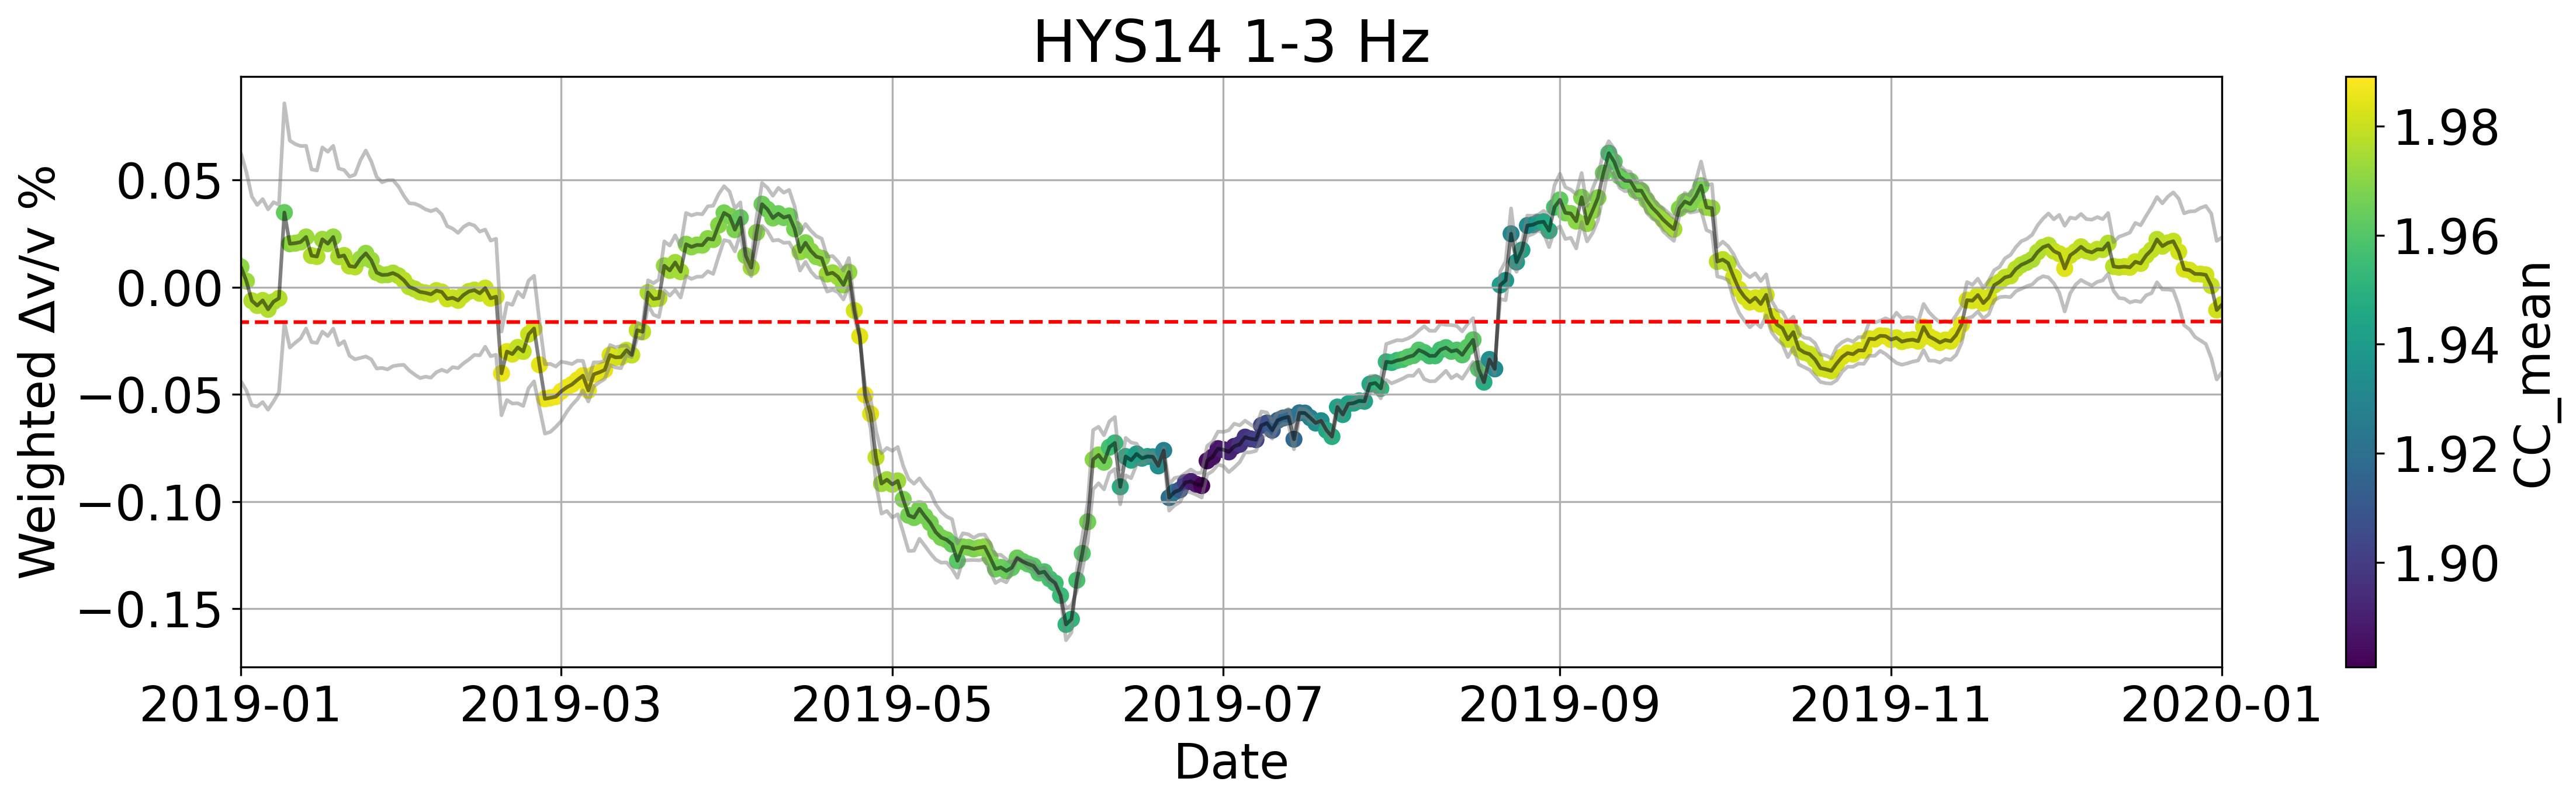

In [7]:
# import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYS14_long_ZE_positive_1-3.csv',
    'Data/HYS14_long_ZE_negative_1-3.csv'
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=0)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=0)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')

# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
#plt.ylim([-0.1, 0.1])
plt.title('HYS14 1-3 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

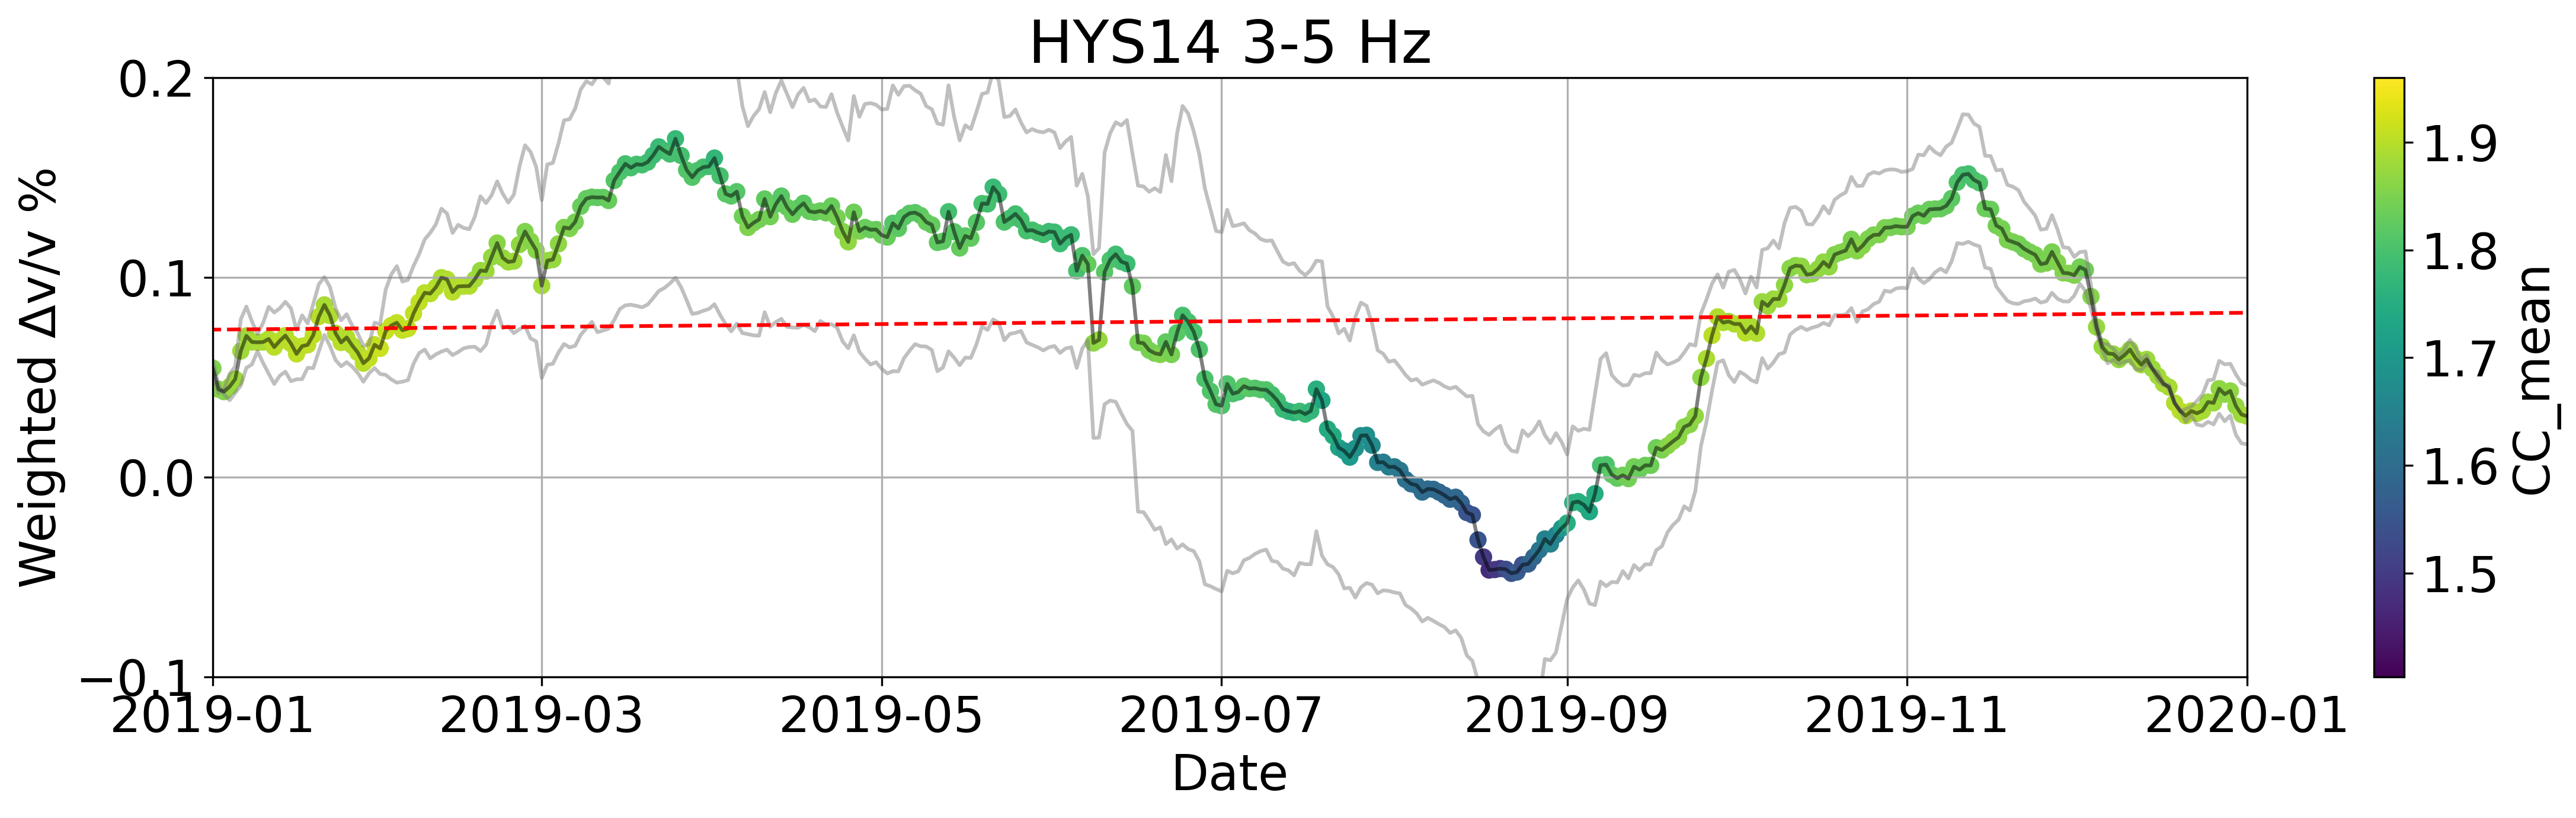

In [12]:
# import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYS14_long_ZE_positive_3-5.csv',
    'Data/HYS14_long_ZE_negative_3-5.csv'
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=0)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=0)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')

# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
plt.ylim([-0.1, 0.2])
plt.title('HYS14 3-5 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

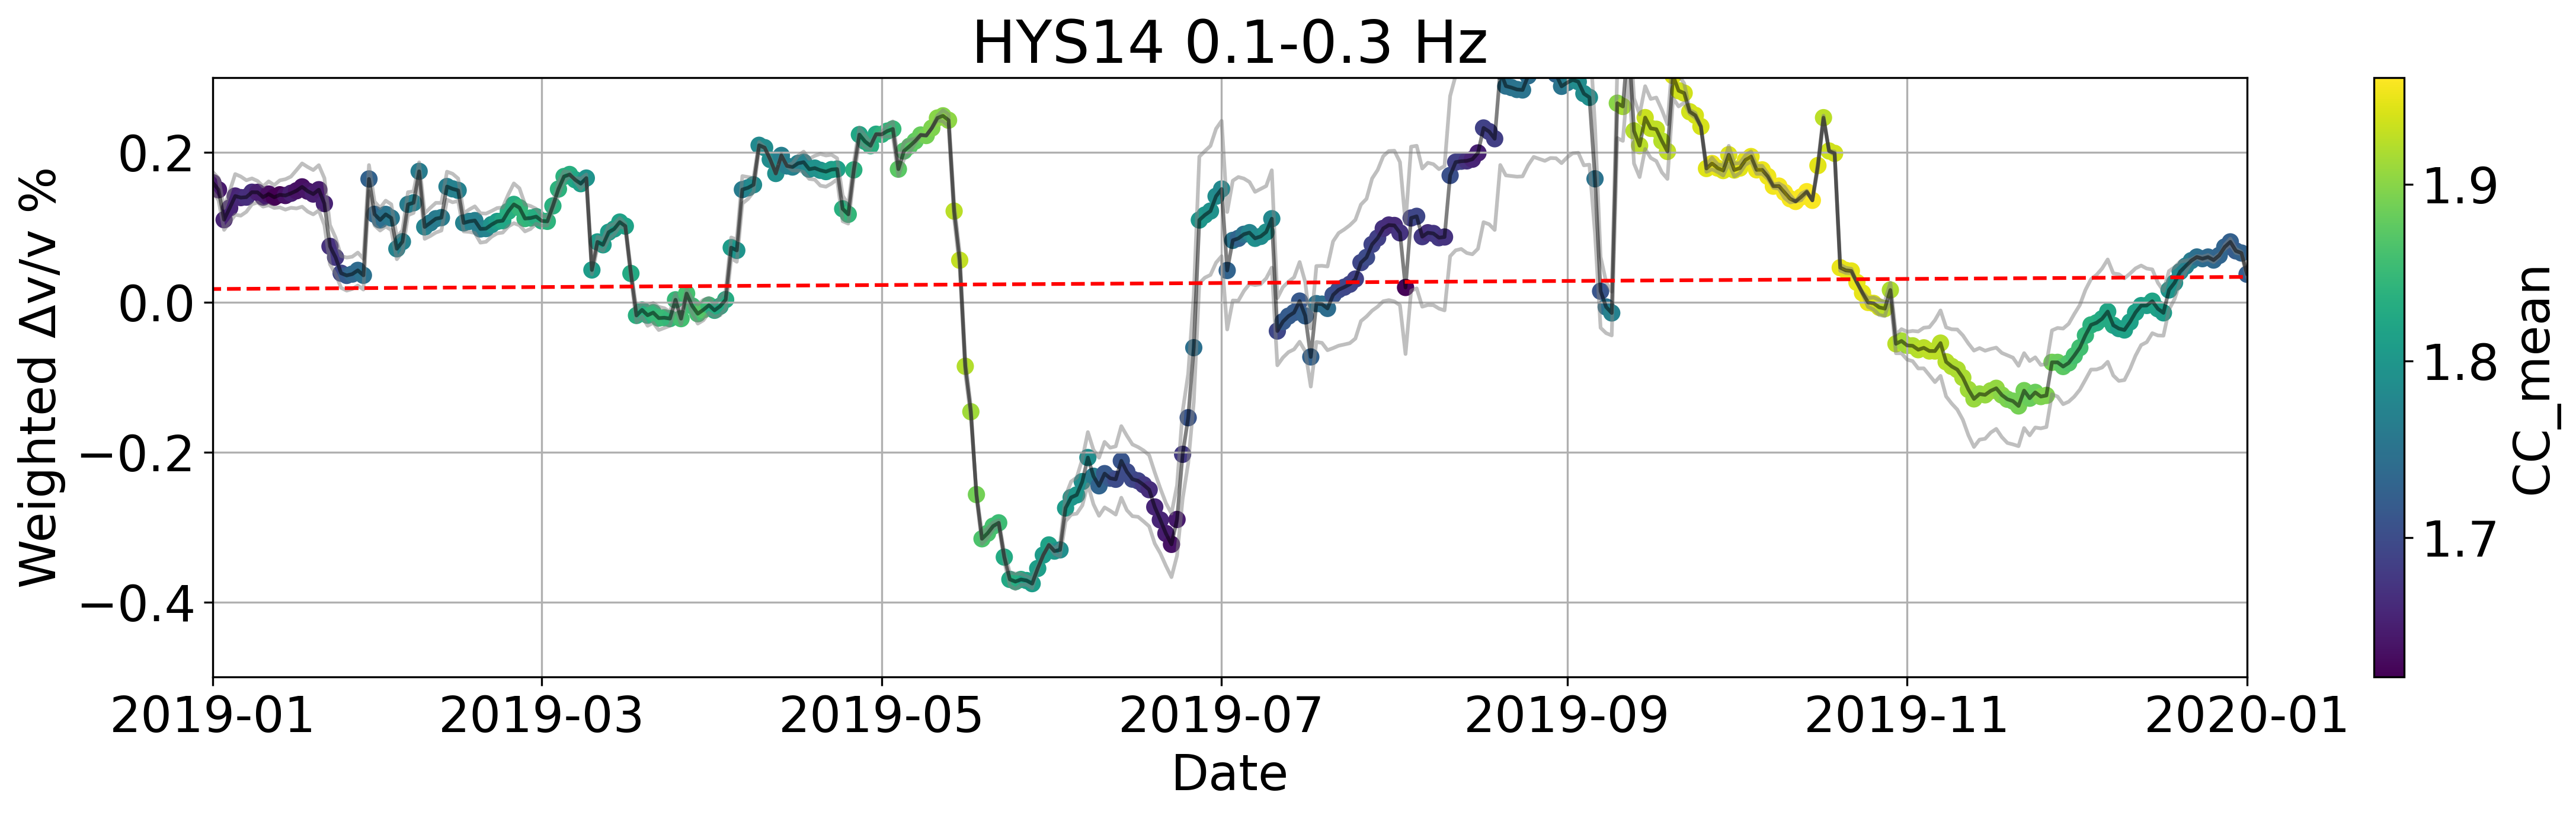

In [54]:
 # import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYS14_long_ZE_negative_0.1-0.3.csv',
    'Data/HYS14_long_ZE_positive_0.1-0.3.csv'
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=20)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=20)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')

# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
plt.ylim([-0.5, 0.3])
plt.title('HYS14 0.1-0.3 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

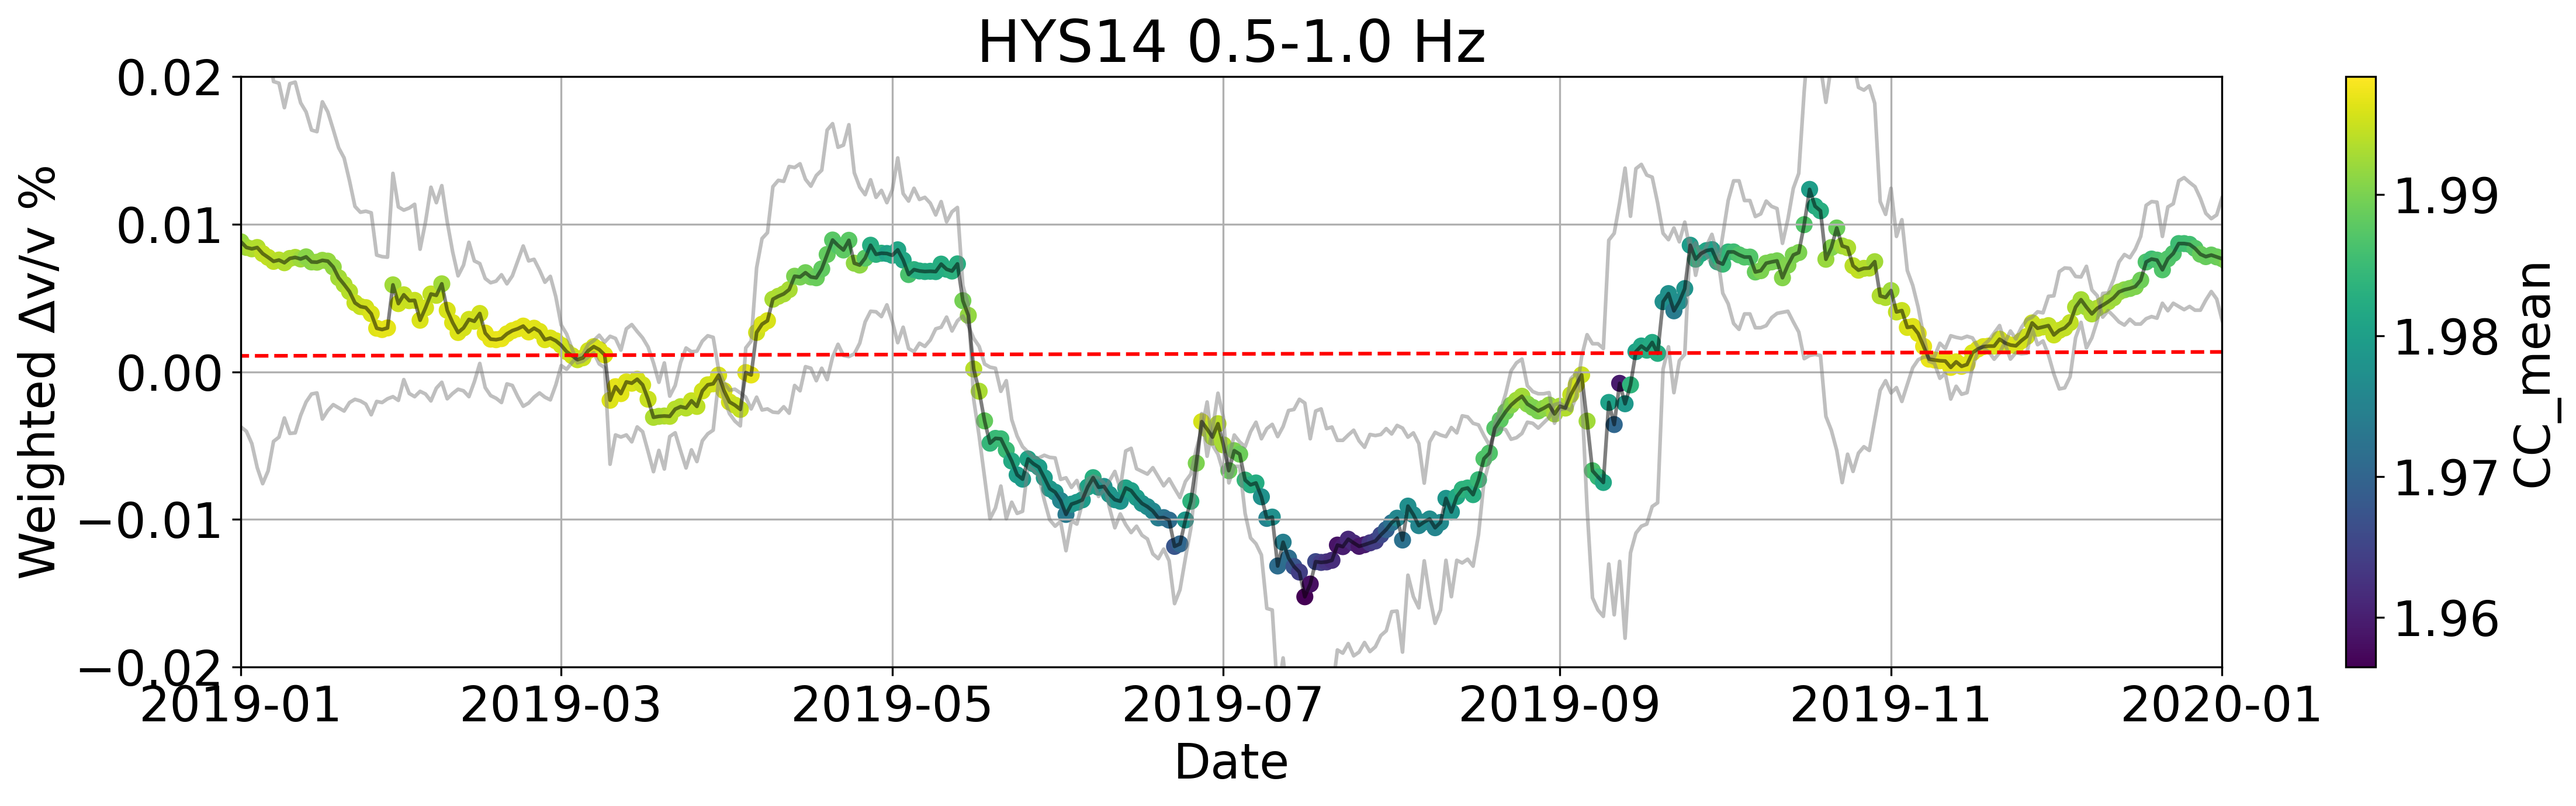

In [45]:
 # import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths = [
    'Data/HYS14_late_ZE_negative_0.5-1.csv',
    'Data/HYS14_late_ZE_positive_0.5-1.csv'
]

# Predefined array with multipliers (-1 or +1)
multipliers = [1,1]

# Read and process dataframes
dataframes = []
for path, multiplier in zip(file_paths, multipliers):
    df = pd.read_csv(path)
    df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
    df['T'] = pd.to_datetime(df['T'])
    df.set_index('T', inplace=True)
    dataframes.append(df)

# Create a unified time index from the union of all timestamps in the dataframes
unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

# Interpolate data for each dataframe to match the unified index
interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

# Shift the grey individual timeseries by 20 days and plot them
plt.figure(figsize=(16, 5), dpi=300)
for df in interpolated_dfs:
    shifted_df = df.copy()
    shifted_df.index = shifted_df.index + pd.DateOffset(days=20)
    plt.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)

# Calculate CC_mean using squared correlation coefficients for each time point
CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

# Calculate weighted Δu/u using squared CCT and DVT
weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

# Normalize CC_mean for coloring
norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Create a DataFrame for the weighted Δv/v time series
weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=20)

# Plotting the weighted Δv/v time series with color-coded CC_mean
# Scatter plot for individual markers with color coding
sc = plt.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
# Line plot to connect markers
plt.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)  # Adjust alpha for line transparency
plt.colorbar(sc, label='CC_mean')

# Adding a trend line
cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
index_as_int = cleaned_df.index.astype(np.int64)
z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
p = np.poly1d(z)
plt.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
plt.xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
# Add labels and legend
plt.xlabel('Date')
plt.ylim([-0.02, 0.02])
plt.title('HYS14 0.5-1.0 Hz')
plt.ylabel('Weighted Δv/v %')
plt.grid(True)
plt.tight_layout()
plt.show()

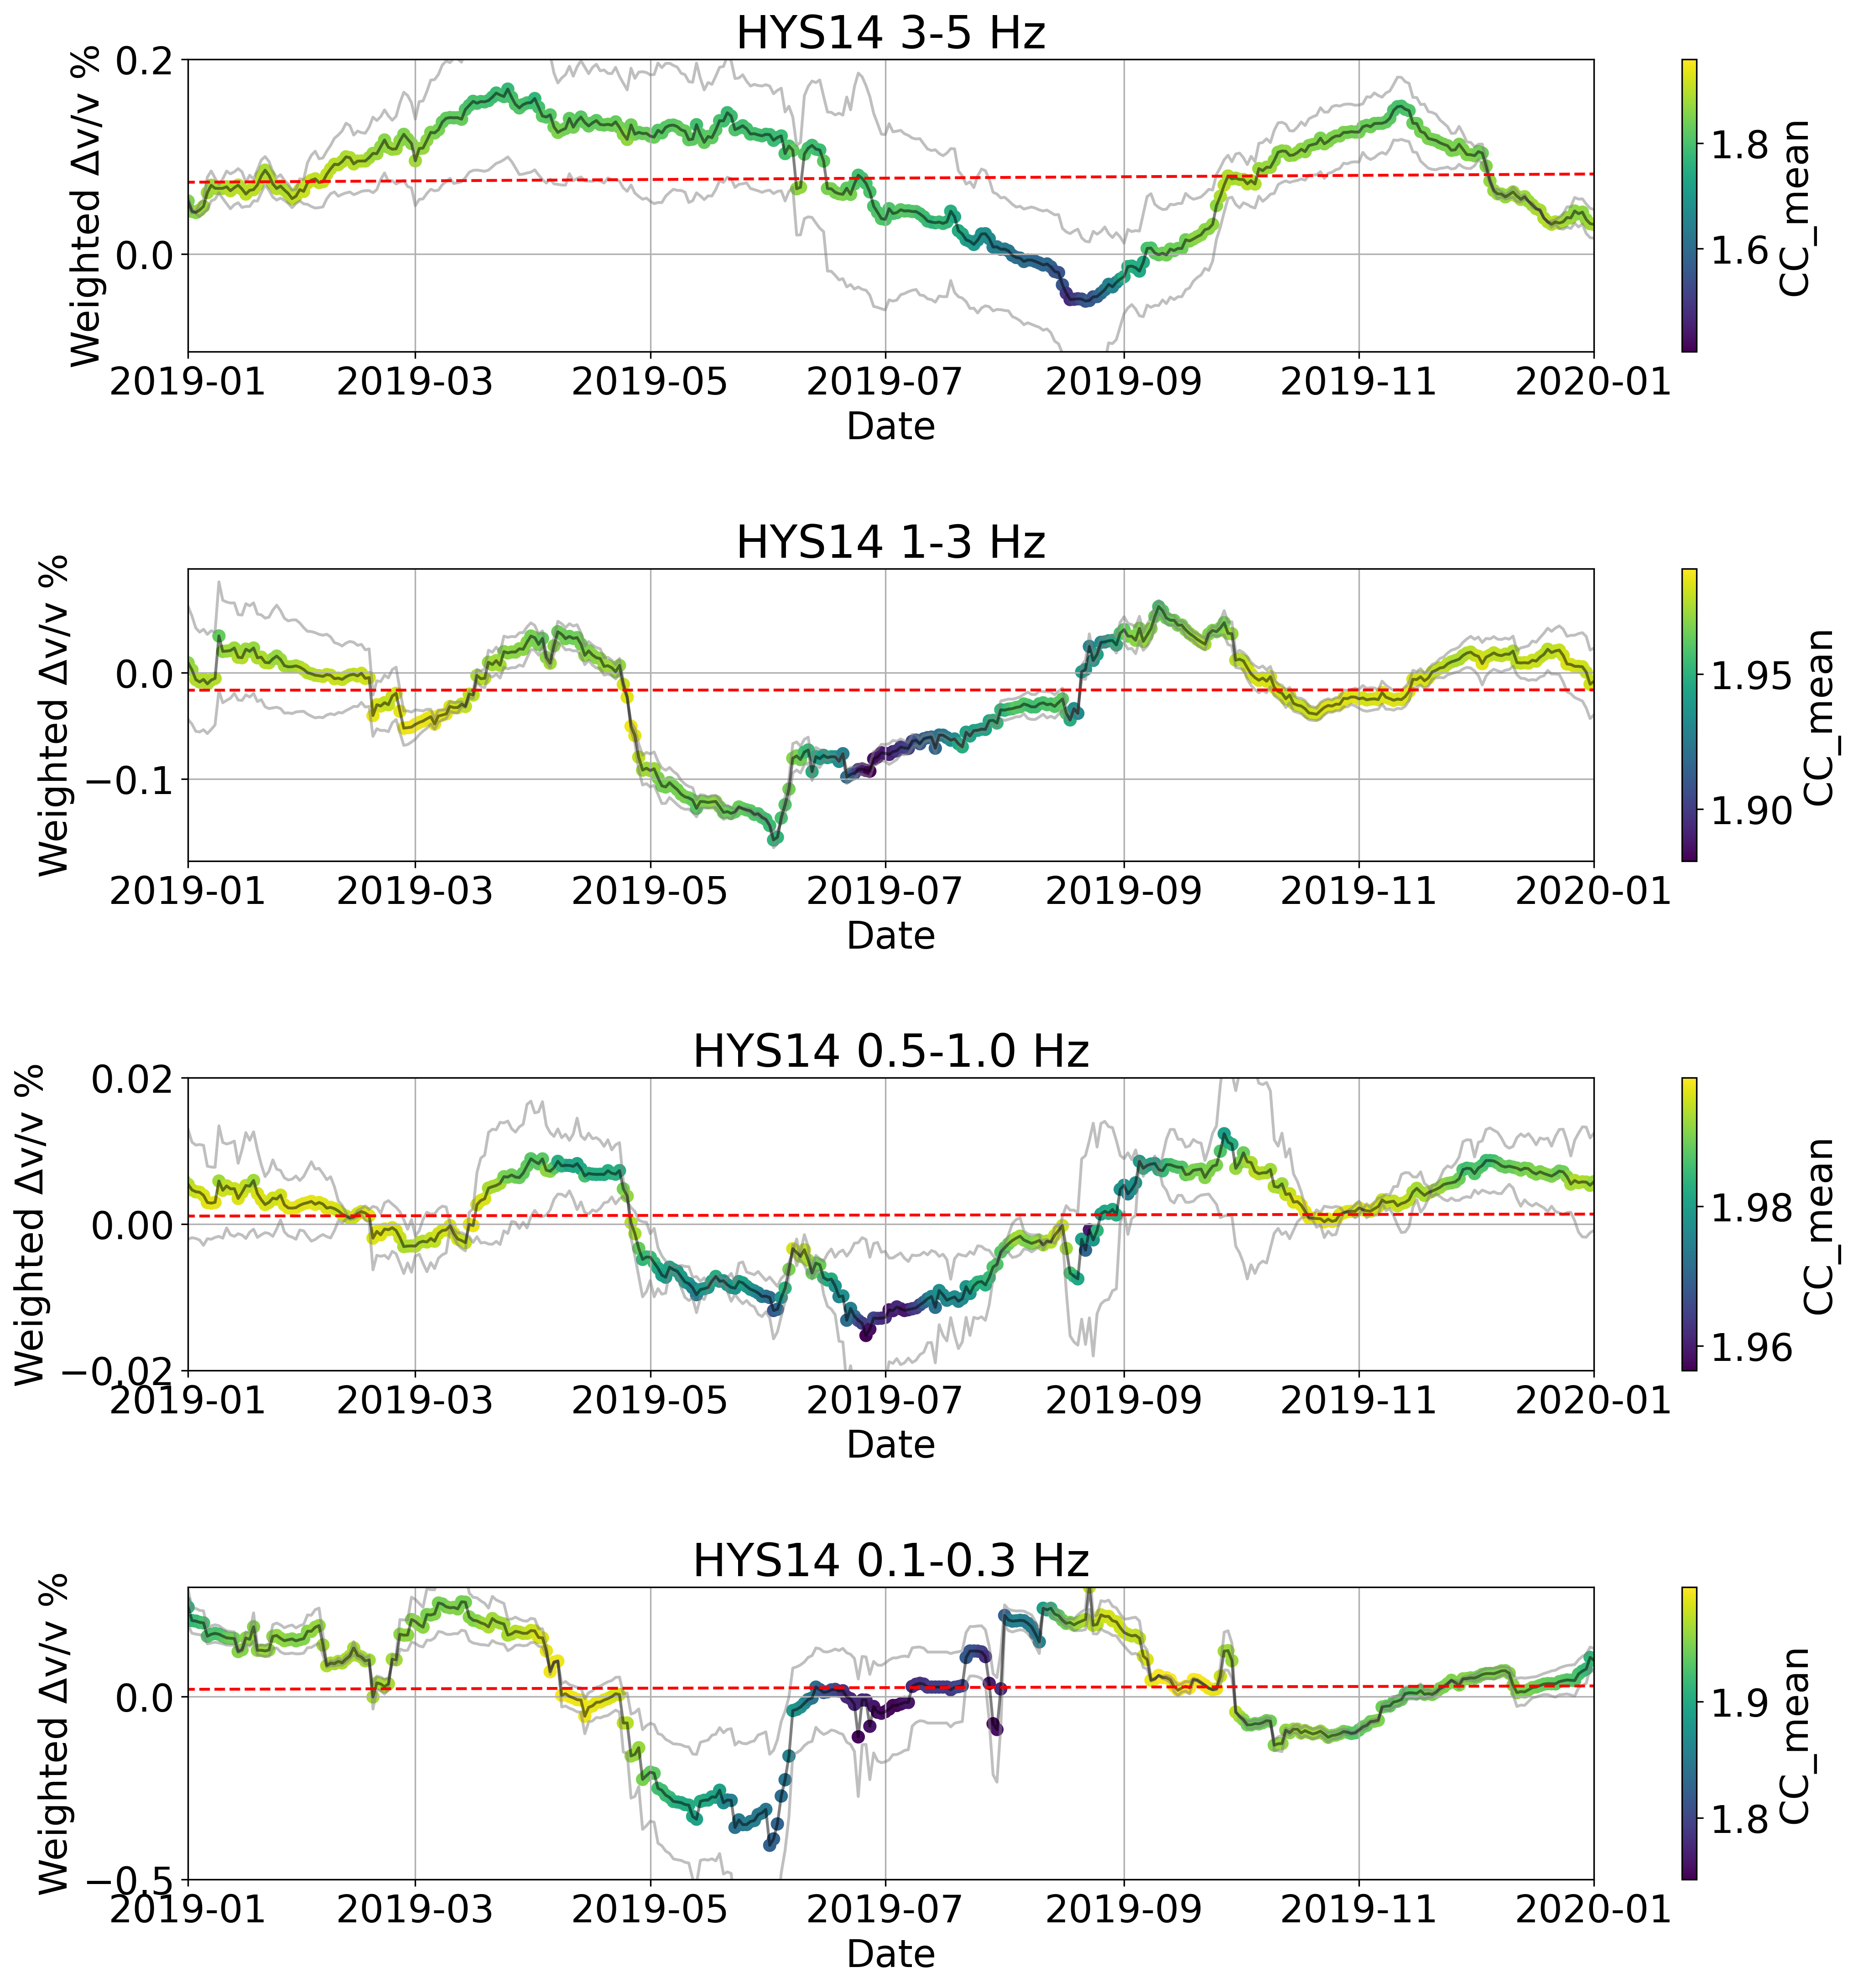

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

def process_and_plot(ax, file_paths, multipliers, day_offset, title, ylabel, ylim=None):
    """
    Reads in two CSV files, processes the data and plots on the given Axes.
    
    Parameters:
      ax         : Matplotlib Axes on which to plot.
      file_paths : List of two file paths (CSV files).
      multipliers: List of two multipliers (e.g., [1,1] or [-1,1]).
      day_offset : Number of days to offset the timeseries.
      title      : Title for the subplot.
      ylabel     : Y-axis label.
      ylim       : Tuple (ymin, ymax) for y-axis limits (default: None).
    """
    # Read and process dataframes
    dataframes = []
    for path, multiplier in zip(file_paths, multipliers):
        df = pd.read_csv(path)
        df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
        df['T'] = pd.to_datetime(df['T'])
        df.set_index('T', inplace=True)
        dataframes.append(df)
    
    # Create a unified time index from the union of all timestamps in the dataframes
    unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))
    
    # Interpolate data for each dataframe to match the unified index
    interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]
    
    # Plot individual grey timeseries with the specified day offset
    for df in interpolated_dfs:
        shifted_df = df.copy()
        shifted_df.index = shifted_df.index + pd.DateOffset(days=day_offset)
        ax.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)
    
    # Calculate CC_mean using squared correlation coefficients for each time point
    CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)
    
    # Calculate weighted Δv/v using squared CCT and DVT
    weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean
    
    # Normalize CC_mean for coloring
    norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
    cmap = cm.viridis  # You can change this colormap if desired
    
    # Create a DataFrame for the weighted Δv/v time series and apply the day offset
    weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
    weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=day_offset)
    
    # Plot the weighted Δv/v timeseries (scatter and line)
    sc = ax.scatter(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'],
                    c=CC_mean, cmap=cmap, norm=norm, label='Weighted Δv/v')
    ax.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 'k-', alpha=0.5)
    
    # Adding a trend line by fitting a polynomial of degree 1
    cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
    # Convert the datetime index to integer (ns since epoch) for polyfit
    index_as_int = cleaned_df.index.astype(np.int64)
    z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
    p = np.poly1d(z)
    ax.plot(weighted_dvv_df.index, p(weighted_dvv_df.index.astype(np.int64)), "r--", label='Trend Line')
    
    # Formatting the subplot
    ax.set_xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01")])
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_title(title)
    ax.grid(True)
    
    # Add a colorbar for the scatter plot on this subplot
    plt.colorbar(sc, ax=ax, label='CC_mean')

# Create a figure with 4 rows (vertical subplots)
fig, axs = plt.subplots(4, 1, figsize=(16, 16), dpi=300)
fig.tight_layout(pad=4)

# --- Subplot 1: HYS14 3-5 Hz ---
process_and_plot(
    ax=axs[0],
    file_paths=['Data/HYS14_long_ZE_positive_3-5.csv', 'Data/HYS14_long_ZE_negative_3-5.csv'],
    multipliers=[1, 1],
    day_offset=0,  # No day offset for this band
    title='HYS14 3-5 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.1, 0.2)
)

# --- Subplot 2: HYS14 1-3 Hz ---
process_and_plot(
    ax=axs[1],
    file_paths=['Data/HYS14_long_ZE_positive_1-3.csv', 'Data/HYS14_long_ZE_negative_1-3.csv'],
    multipliers=[1, 1],
    day_offset=0,  # No day offset for this band
    title='HYS14 1-3 Hz',
    ylabel='Weighted Δv/v %'
    # ylim not specified; default autoscaling will be used.
)

# --- Subplot 3: HYS14 0.5-1.0 Hz ---
process_and_plot(
    ax=axs[2],
    file_paths=['Data/HYS14_late_ZE_negative_0.5-1.csv', 'Data/HYS14_late_ZE_positive_0.5-1.csv'],
    multipliers=[1, 1],
    day_offset=0,  # Shift timeseries by 20 days
    title='HYS14 0.5-1.0 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.02, 0.02)
)

# --- Subplot 4: HYS14 0.1-0.3 Hz ---
process_and_plot(
    ax=axs[3],
    file_paths=['Data/HYS14_0103ZEp.csv', 'Data/HYS14_0103ZEn.csv'],
    multipliers=[-1, 1],
    day_offset=20,  # Shift timeseries by 20 days
    title='HYS14 0.1-0.3 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.5, 0.3)
)

plt.show()


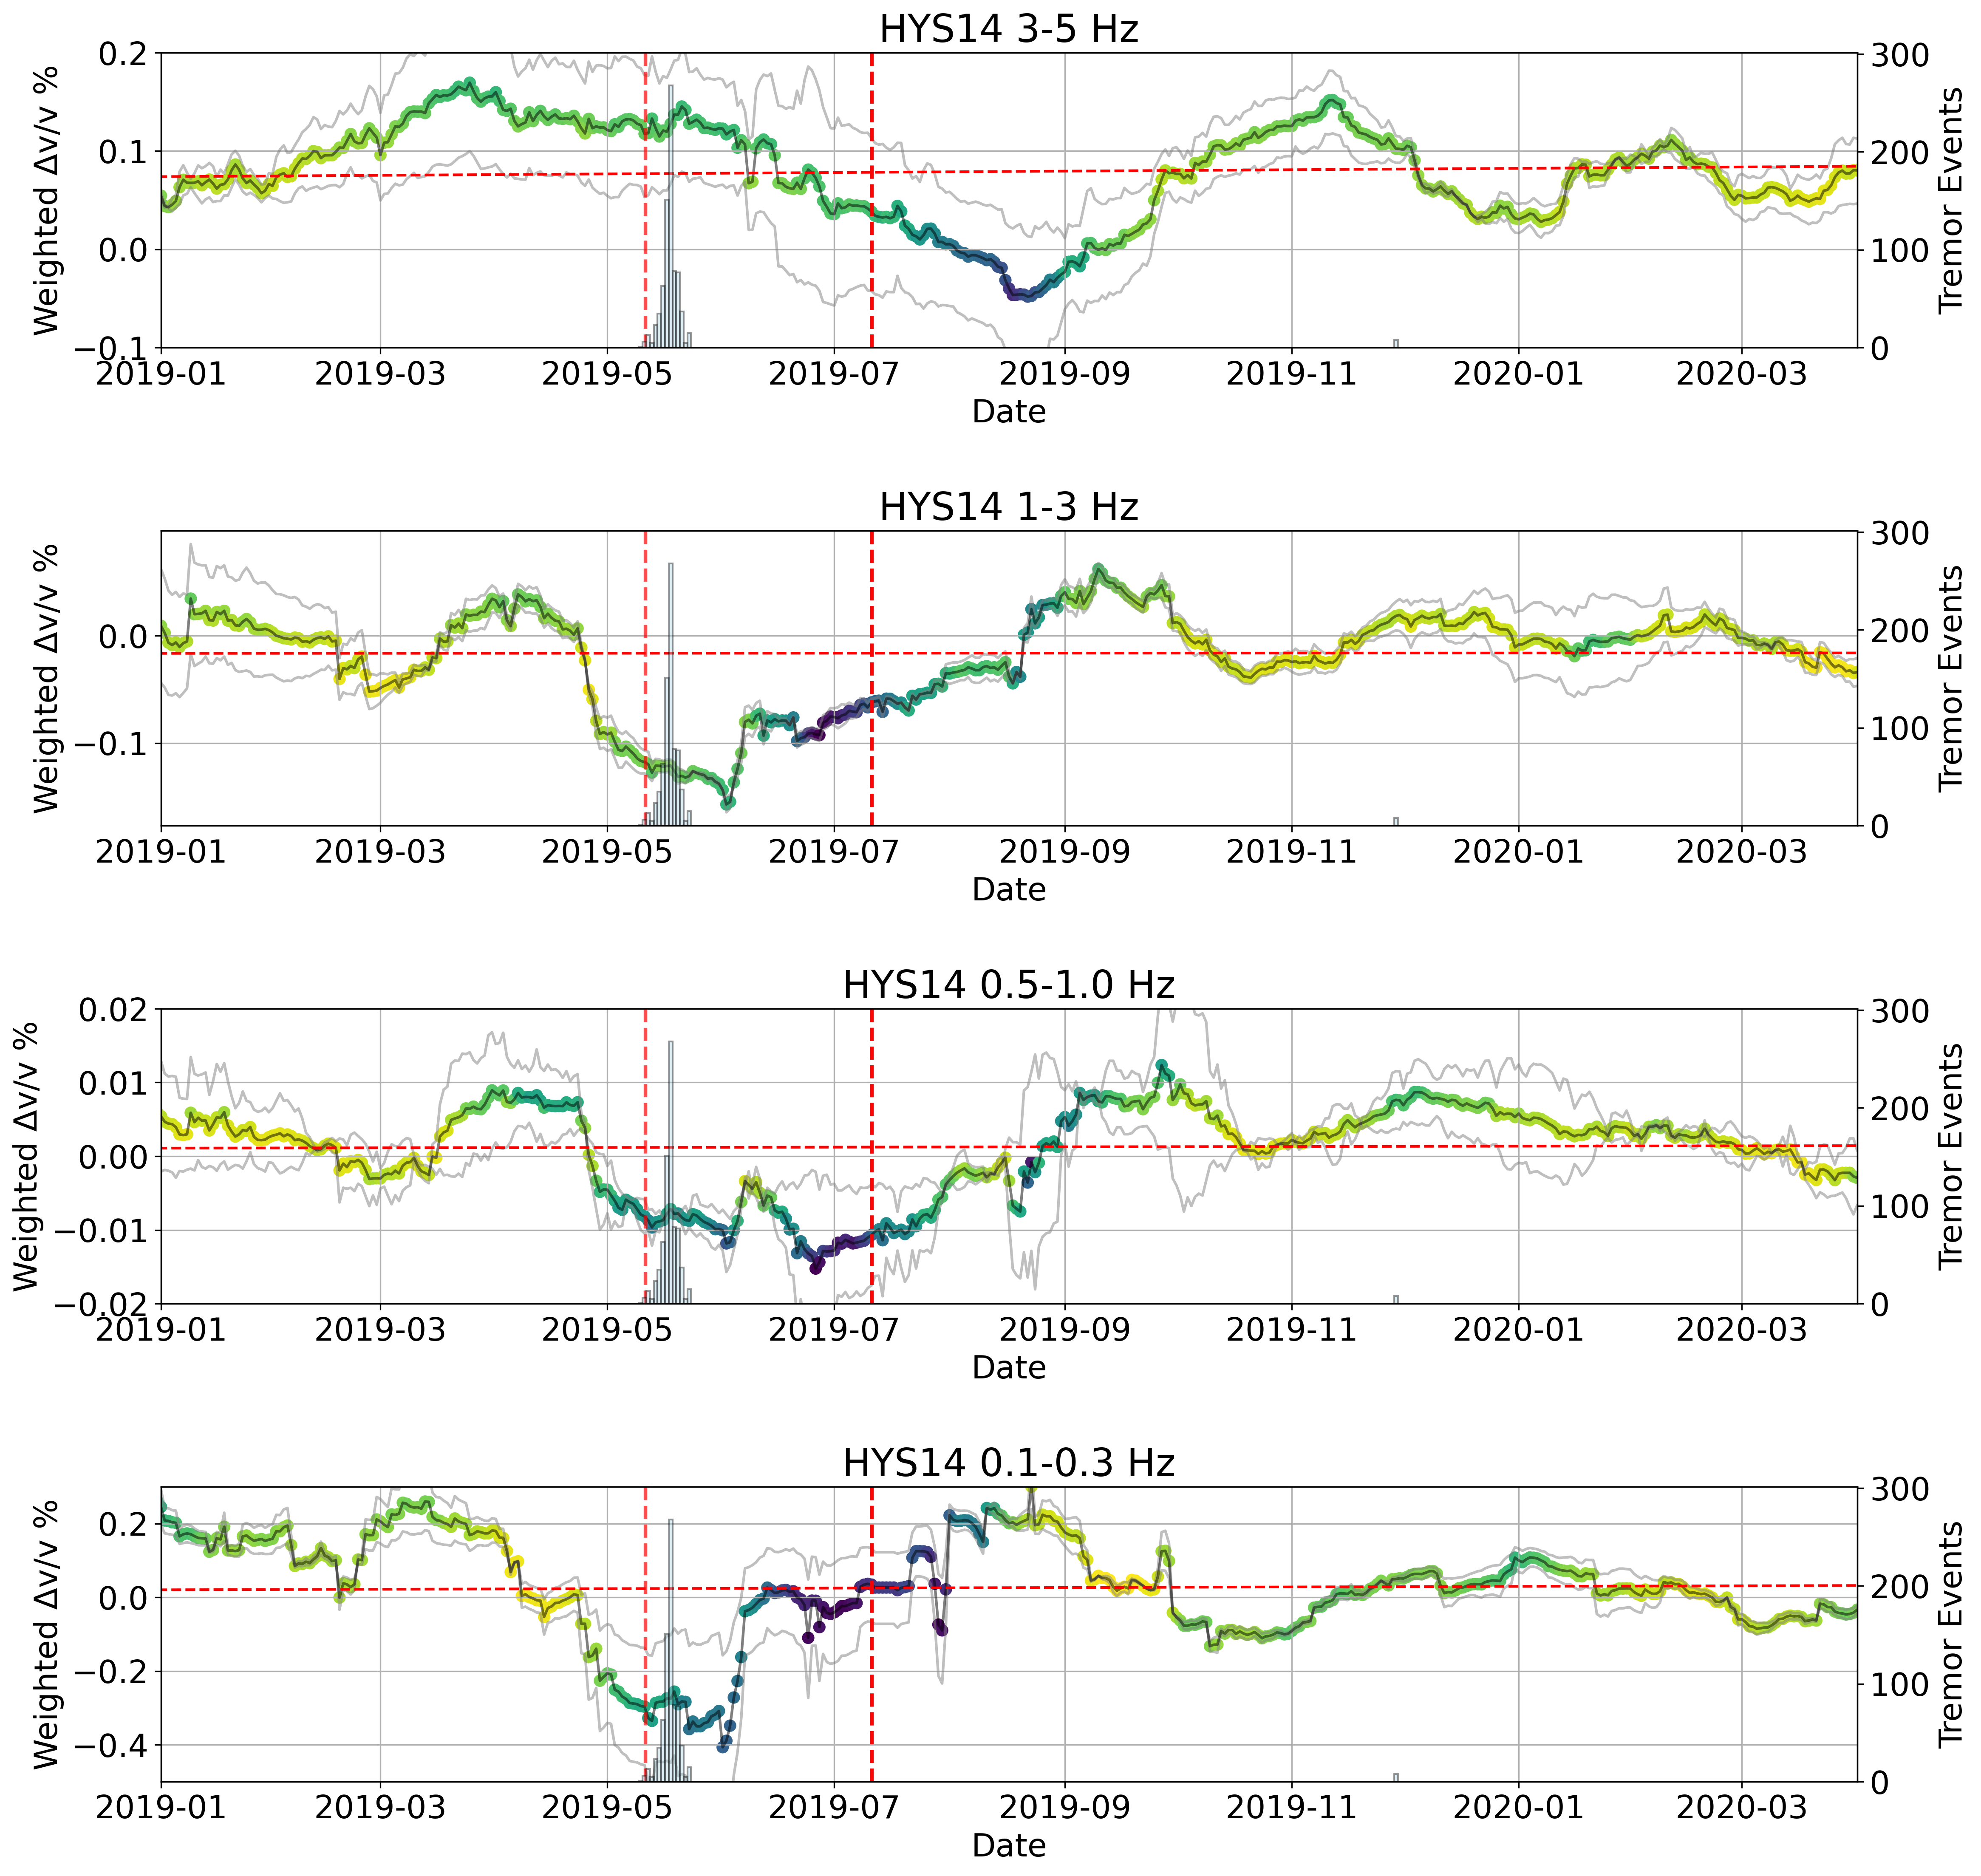

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

###############################################################################
# 1) DEFINE TREMOR DATES (AS STRINGS) AND CONVERT TO DATETIMES
###############################################################################
Tdates2 = [
    '2015-06-24 22:25:29.343674','2015-10-21 07:10:22.988772','2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124','2016-06-04 14:36:16.085195','2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686','2016-08-14 00:35:30.246556','2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344','2016-09-01 15:43:16.550527','2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149','2016-09-24 18:19:27.635143','2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618','2016-10-02 12:07:35.052668','2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326','2017-09-06 10:28:44.366246','2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897','2017-09-06 13:15:45.526103','2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666','2017-09-06 13:55:55.805070','2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153','2017-09-06 14:10:55.909249','2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593','2017-09-06 15:14:26.350272','2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749','2017-09-06 17:02:57.103831','2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455','2017-09-06 17:37:27.343443','2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812','2018-03-13 15:48:13.211856','2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239','2018-09-19 07:27:03.104526','2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251','2019-07-11 03:32:31.888329','2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977','2020-07-09 09:30:43.963422'
]
# Convert each string to a Pandas Timestamp (datetime)
Tdates2_dt = [pd.to_datetime(d) for d in Tdates2]

###############################################################################
# 2) LOAD TREMOR COUNTS (OPTIONAL) FOR SECONDARY Y-AXIS BAR PLOT
###############################################################################
# Make sure this CSV has a DateTime index and a column named 'Number of Events'.
# Adjust the path/filename and column name as needed.
tremor_df = pd.read_csv(
    "Data/filtered_events_per_day_lat_44.csv",
    parse_dates=True,
    index_col=0
)

###############################################################################
# 3) DEFINE A FUNCTION TO PROCESS FILES AND PLOT
###############################################################################
def process_and_plot(
    ax, 
    file_paths, 
    multipliers, 
    day_offset, 
    title, 
    ylabel, 
    ylim=None
):
    """
    Reads two CSV files, processes the data, and plots on the given Axes (ax).

    Parameters:
      ax         : Matplotlib Axes on which to plot.
      file_paths : List of two file paths (CSV files).
      multipliers: List of two multipliers (e.g., [1,1] or [-1,1]).
      day_offset : Number of days to offset the time series.
      title      : Title for the subplot.
      ylabel     : Y-axis label.
      ylim       : Tuple (ymin, ymax) for y-axis limits (default: None).
    """
    # (A) Read & process dataframes
    dataframes = []
    for path, multiplier in zip(file_paths, multipliers):
        df = pd.read_csv(path)
        df['DVT'] *= multiplier  # Apply the multiplier
        df['T'] = pd.to_datetime(df['T'])
        df.set_index('T', inplace=True)
        dataframes.append(df)
    
    # (B) Create unified time index & interpolate
    unified_index = pd.to_datetime(
        sorted(set.union(*(set(df.index) for df in dataframes)))
    )
    interpolated_dfs = [
        df.reindex(unified_index).interpolate()
        for df in dataframes
    ]
    
    # (C) Plot individual grey time series with day offset
    for df in interpolated_dfs:
        shifted_df = df.copy()
        shifted_df.index = shifted_df.index + pd.DateOffset(days=day_offset)
        ax.plot(shifted_df.index, shifted_df['DVT'], color='grey', alpha=0.5)
    
    # (D) Calculate weighted Δv/v
    CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)
    weighted_dvv = sum(
        df['CCT']**2 * df['DVT'] 
        for df in interpolated_dfs
    ) / CC_mean
    
    # (E) Make a DataFrame & apply day offset
    weighted_dvv_df = pd.DataFrame(
        weighted_dvv, columns=['Weighted Δv/v']
    )
    weighted_dvv_df.index = (
        weighted_dvv_df.index + pd.DateOffset(days=day_offset)
    )
    
    # (F) Scatter + line for Weighted Δv/v with color-coded CC_mean
    norm = mcolors.Normalize(vmin=CC_mean.min(), vmax=CC_mean.max())
    cmap = cm.viridis
    sc = ax.scatter(
        weighted_dvv_df.index,
        weighted_dvv_df['Weighted Δv/v'],
        c=CC_mean, cmap=cmap, norm=norm
    )
    ax.plot(
        weighted_dvv_df.index,
        weighted_dvv_df['Weighted Δv/v'],
        'k-', alpha=0.5
    )
    
    # (G) Trend line
    cleaned_df = weighted_dvv_df.dropna(subset=['Weighted Δv/v'])
    index_as_int = cleaned_df.index.astype(np.int64)  # convert dates->int
    z = np.polyfit(index_as_int, cleaned_df['Weighted Δv/v'], 1)
    p = np.poly1d(z)
    ax.plot(
        weighted_dvv_df.index, 
        p(weighted_dvv_df.index.astype(np.int64)), 
        "r--", 
        label='Trend Line'
    )
    
    # (H) ADD TREMOR DATES (vertical dashed red lines)
    for dt in Tdates2_dt:
        ax.axvline(dt, color='red', linestyle='--', alpha=0.7, linewidth=2)
    
    # (I) SECONDARY Y-AXIS FOR TREMOR COUNTS
    ax2 = ax.twinx()
    ax2.bar(
        tremor_df.index, 
        tremor_df['Number of Events'],
        width=1.0,
        color='lightblue',
        edgecolor='black',
        alpha=0.4
    )
    ax2.set_ylabel("Tremor Events")
    
    # (J) Format subplot
    ax.set_xlim([pd.to_datetime("2019-01-01"), pd.to_datetime("2020-04-01")])
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    # Add colorbar for CC_mean
    #plt.colorbar(sc, ax=ax, label='CC_mean')
plt.rcParams.update({'font.size': 18})
###############################################################################
# 4) CREATE THE FIGURE WITH 4 SUBPLOTS, USING process_and_plot(...)
###############################################################################
fig, axs = plt.subplots(4, 1, figsize=(16, 16), dpi=300)
fig.tight_layout(pad=4)

# --- Subplot 1: HYS14 3-5 Hz ---
process_and_plot(
    ax=axs[0],
    file_paths=[
        'Data/HYS14_long_ZE_positive_3-5.csv',
        'Data/HYS14_long_ZE_negative_3-5.csv'
    ],
    multipliers=[1, 1],
    day_offset=0,
    title='HYS14 3-5 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.1, 0.2)
)

# --- Subplot 2: HYS14 1-3 Hz ---
process_and_plot(
    ax=axs[1],
    file_paths=[
        'Data/HYS14_long_ZE_positive_1-3.csv',
        'Data/HYS14_long_ZE_negative_1-3.csv'
    ],
    multipliers=[1, 1],
    day_offset=0,
    title='HYS14 1-3 Hz',
    ylabel='Weighted Δv/v %'
)

# --- Subplot 3: HYS14 0.5-1.0 Hz ---
process_and_plot(
    ax=axs[2],
    file_paths=[
        'Data/HYS14_late_ZE_negative_0.5-1.csv',
        'Data/HYS14_late_ZE_positive_0.5-1.csv'
    ],
    multipliers=[1, 1],
    day_offset=0, 
    title='HYS14 0.5-1.0 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.02, 0.02)
)

# --- Subplot 4: HYS14 0.1-0.3 Hz ---
process_and_plot(
    ax=axs[3],
    file_paths=[
        'Data/HYS14_0103ZEp.csv',
        'Data/HYS14_0103ZEn.csv'
    ],
    multipliers=[-1, 1],
    day_offset=20,
    title='HYS14 0.1-0.3 Hz',
    ylabel='Weighted Δv/v %',
    ylim=(-0.5, 0.3)
)

plt.show()
